In [1]:
# !pip install xgboost

## Importing necessary libraries
- Using pandas and numpy for dataframe operations.
- Using sklearn for building variety of  models.
- Using plotly for complex data visualization & seaorn for other simple graphs.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import tight_layout
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,PowerTransformer,OrdinalEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB,MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings



warnings.filterwarnings("ignore")
%matplotlib inline

c:\Users\hirsh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\hirsh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\hirsh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hirsh\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
bank=pd.read_csv("bank Market prediction.csv")
print(bank.shape)
display(bank.head(5))

X=bank.drop(columns='deposit').copy()
y=bank['deposit']

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Input variables:
 #### bank client data:
   1. age (numeric)
   2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
   3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
   4. education (categorical: 'secondary' 'tertiary' 'primary' 'unknown')
   5. default: has credit in default? (categorical: 'no','yes','unknown')
   6. housing: has housing loan? (categorical: 'no','yes','unknown')
   7. loan: has personal loan? (categorical: 'no','yes','unknown')
 #### related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: 'cellular','telephone') 
   9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
  10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  11. duration: last contact duration, in seconds (numeric). 
  12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. previous: number of contacts performed before this campaign and for this client (numeric)
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
 #### Output variable (desired target):
  16. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Hypothesis

1. Unemployed,housemaid,self-employed & students are less likely to prefer Term Deposits.
2. Married customers are more likely to open a Term Deposit.
3. Those with Secondary and Primary education are more likely to open bank deposits.
4. Those with a default and personal/housing loans will not prefer  Term Deposits.
5. Almost Marketing in all months will have the same results.


<AxesSubplot: xlabel='deposit', ylabel='count'>

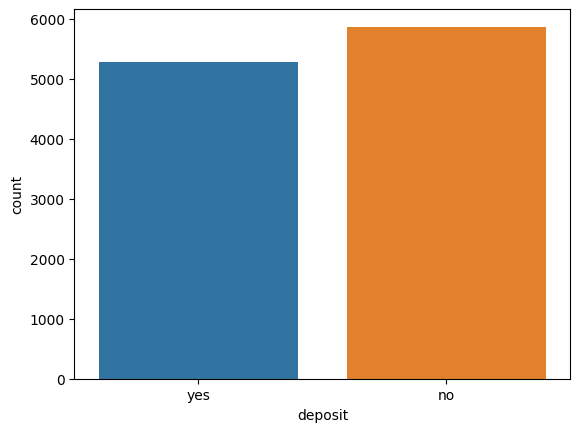

In [5]:
sns.countplot(data=bank,x='deposit')

- The dataset is balanced enough so there is no need to apply SMOTE.
- We can directly use the Accuracy score as the evaluation metric.

# Explore the data

### Numerical Data Distribution:

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Distribution of Age among customers: 


Text(0.5, 1.0, 'Age of all the customers ')

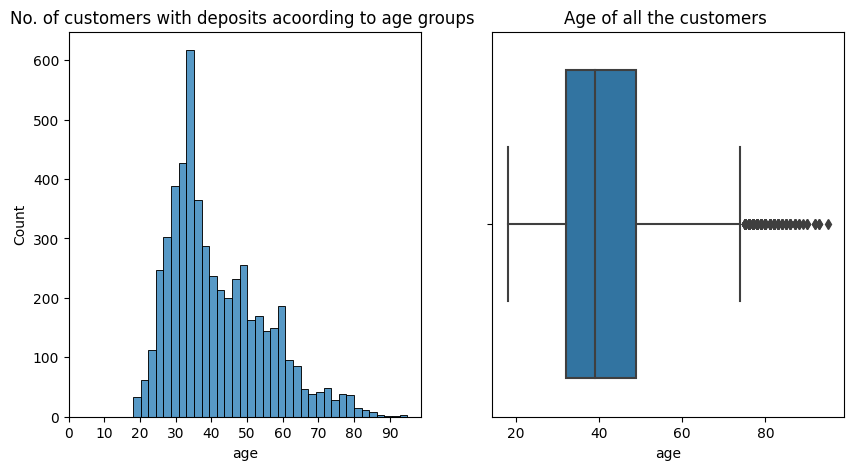

In [7]:
print("Distribution of Age among customers: ")

job_deposit=bank[bank['deposit']=='yes'].copy()


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x=job_deposit['age'],data=bank)
age_list=[i for i in range(0,100,10)]
plt.xticks(age_list)
plt.title("No. of customers with deposits acoording to age groups ")

plt.subplot(1,2,2)
sns.boxplot(x=bank['age'])
plt.title("Age of all the customers ")

- Most of the customers are in the age range of 30 to 45 but there are some below this age starting from 18 yrs and few above this range till 95 yrs.


In [8]:
age_occ=bank.groupby('job',as_index=False).agg({'age':'mean'})
age_occ.sort_values(by='age',ascending=False,inplace=True)



In [9]:
fig = px.bar(x=age_occ['job'],y=age_occ['age'])
fig.update_layout(
    title="Age vs Jobs ",
    xaxis_title="Job Roles ",
    yaxis_title="Age",
        font=dict(
        family="Times New Roman",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

- We can see that the outliers in our dataset for age above 70 yrs correspond to the retired customers.Whereas the customers below 30 yrs are all students.


In [10]:
job_counts=pd.DataFrame(bank['job'].value_counts())
px.pie(names=job_counts.index,values=job_counts['job'].values,title="Number of Customers in each Job")

- Majority of the customers are employed in management,blue-collar,technicians very few customers are housemaids,students or unemployed.

In [11]:
fig=make_subplots(rows=1,cols=2)

px1=px.histogram(x=bank['balance'])
px2=px.box(x=bank['balance'])

px1=go.Histogram(x=bank['balance'])
px2=go.Box(y=bank['balance'])

fig.update_layout(
    title="Bank Balance ",

    legend_title="Legend Title",
    font=dict(
        family="Times New Roman ",
        size=18,
        color="RebeccaPurple"
    )
)


fig.add_trace(px1,row=1,col=1)
fig.add_trace(px2,row=1,col=2)



- The Box plot clearly shows the balance displarity among the different customers.
- On one end the customers are in debt with bank balance < 0 while others have bank balance more that 80K.
- Lets analyze whether those with bank balance less that zero are actually defaulters or not.

In [12]:
print("Total Number of Defaulters = ",bank[bank['default']=='yes'].shape[0])

print("Total Number of Defaulters with either loan = ",bank[(bank['default']=='yes') & ((bank['loan']=='yes') | (bank['housing']=='yes'))].shape[0])

print("Total Number of Defaulters with both the loans = ",bank[(bank['default']=='yes') & ((bank['loan']=='yes') & (bank['housing']=='yes'))].shape[0])

print("Total Number of Defaulters with None of the loans = ",bank[(bank['default']=='yes') & ((bank['loan']=='No') | (bank['housing']=='No'))].shape[0])

Total Number of Defaulters =  168
Total Number of Defaulters with either loan =  121
Total Number of Defaulters with both the loans =  23
Total Number of Defaulters with None of the loans =  0


Percent of Defaulters with balance in negative (less than 0) are : 
46.42857142857143 %


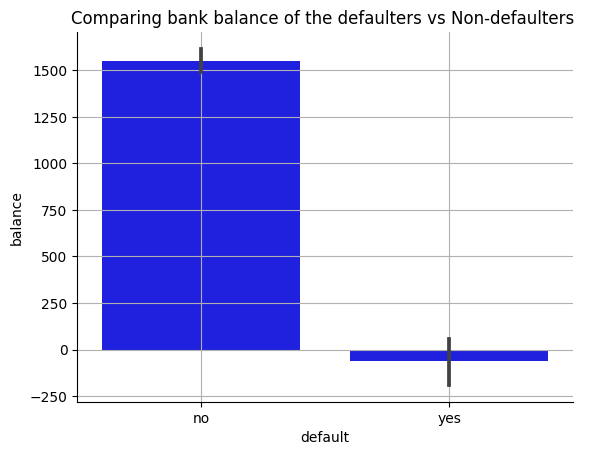

In [13]:
print("Percent of Defaulters with balance in negative (less than 0) are : ")
print(100*(bank.loc[(bank['default']=='yes') & (bank['balance']<0),'balance'].shape[0]/bank.loc[(bank['default']=='yes')].shape[0])
,"%")


sns.barplot(x=bank['default'],y=bank['balance'],color='blue')
sns.despine()
plt.grid()
plt.title("Comparing bank balance of the defaulters vs Non-defaulters ");

In [14]:
job_balance=bank.groupby('job',as_index=False).agg({'balance':'median'}).sort_values(by='balance',ascending=False,inplace=True)

display(job_balance)
# px.bar(x=job_balance['job'],y=job_balance['balance'])

None

- Most of the defaulters have bank balance less than 0.
- Conclusion:- Majority of the Defaulters have taken some of the loans and have usually have bank balance less than zero.

In [15]:
# Lets identify from which occupations has the highest number of defaulters:
defaulters=bank[bank['default']=='yes'].groupby('job',as_index=False).agg({'default':'value_counts'}).sort_values(by='default',ascending=False)
fig=px.bar(x=defaulters['job'],y=defaulters['default'])





fig.update_layout(
    title="No. of defaulters from each job ",
    xaxis_title="Jobs ",
    yaxis_title="Defaulters Count ",
    legend_title="Legend Title",
    font=dict(
        family="Times New Roman",
        size=18,
        color="RebeccaPurple"
    )
)

- Most of the defaulters are from blue-collar,management and technician.
- Blue-collar,management and technician these are the ones with low bank balance and they also have high chance of defalting.
- Other reasons for defaulting may be due to personal and housing loans as can be seen from above numbers.

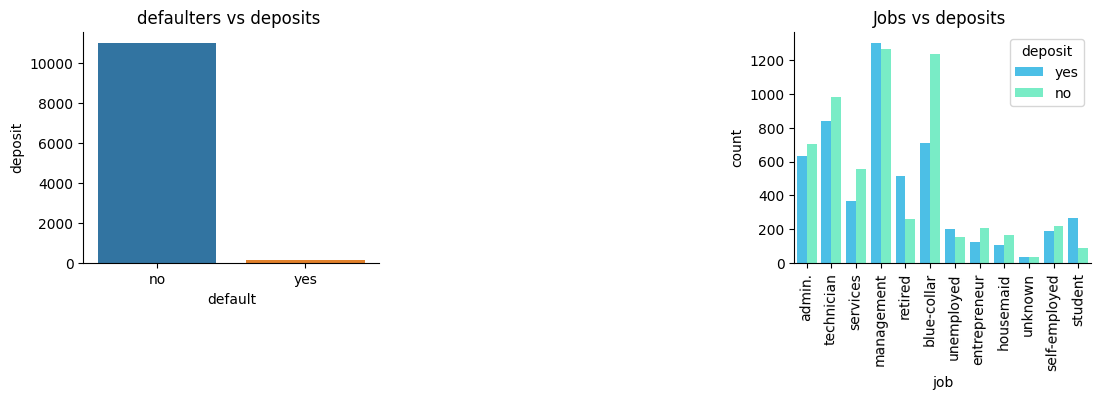

In [16]:
plt.figure(figsize=(13,3))

plt.subplot(1,3,1)
default_deposits=bank.groupby('default',as_index=False).agg({'deposit':'count'})
default_deposits
sns.barplot(data=default_deposits,x='default',y='deposit')
plt.title("defaulters vs deposits ")

plt.subplot(1,3,3)
sns.countplot(data=bank,x='job',hue='deposit',palette=['#33ccff','#66ffcc'],orient="h")
sns.despine()
plt.title("Jobs vs deposits ")
plt.xticks(rotation=89);


- The defaulters are rarely involved in deposits whereas the non defaulters prefer deposits.
- Retired,Students,unemployed customers prefer deposits more. Might be due to no fixed source of income .
- Techinicians,blue-collar,admin,services and enterpreneur are most likely to invest in assests rather than make deposits.


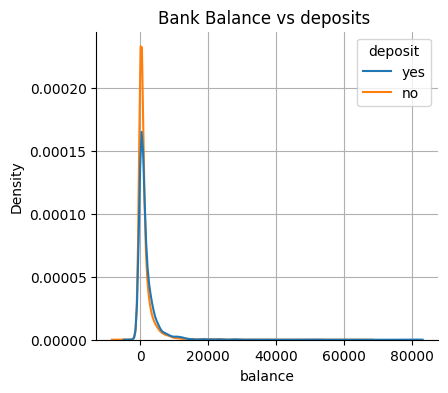

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.kdeplot(x=bank['balance'],hue=bank['deposit'])
sns.despine()
plt.title("Bank Balance vs deposits ")
plt.grid()



- Customers with low bank balance usually do not prefer subscirbing to deposits however as the income increases above 10K preference to deposits increases.

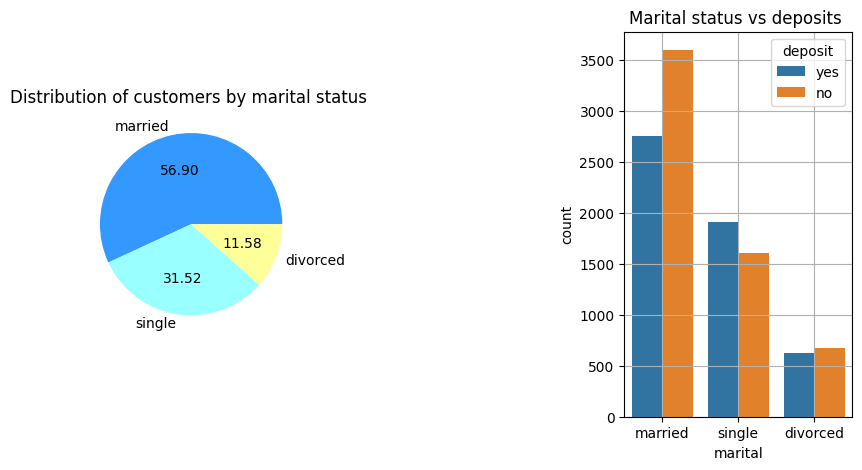

In [18]:
# plt.subplots(1,2)
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.pie(labels=bank['marital'].unique(),x=bank['marital'].value_counts(),colors=['#3399ff','#99ffff','#ffff99'],autopct='%.2f');
plt.title("Distribution of customers by marital status ")



sns.countplot(data=bank,x='marital',hue='deposit',axes=plt.subplot(1,3,3));
plt.grid()
plt.title("Marital status vs deposits ");

# fig.tig



- Most of the customers are married. Among the married, customers do not prefer to have deposits but singles prefer to have
deposit. 
- Checking the loan status according to marital status


In [19]:
temp=bank.copy()
temp['loan']=temp['loan'].apply(lambda x:True if x=='yes' else False)
temp['housing']=temp['housing'].apply(lambda x:True if x=='yes' else False)

temp['Has Loan'] = temp['loan']+temp['housing']

print(temp['Has Loan'].value_counts())

True     5906
False    5256
Name: Has Loan, dtype: int64


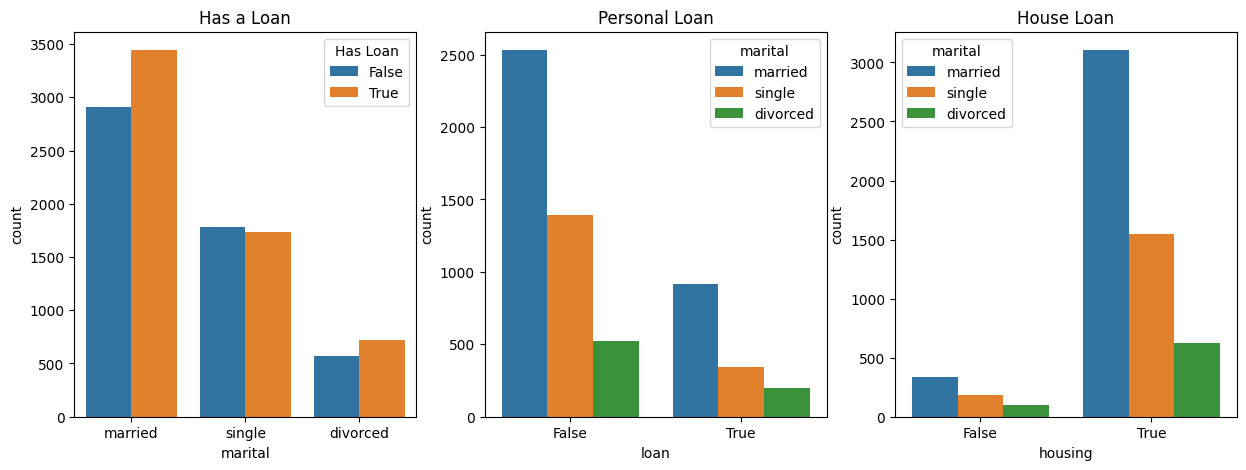

In [20]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x=temp['marital'],hue=temp['Has Loan'])
plt.title("Has a Loan");

plt.subplot(1,3,2)
sns.countplot(x=temp.loc[temp['Has Loan']==True,'loan'],hue=temp['marital'])
plt.title("Personal Loan");

plt.subplot(1,3,3)
sns.countplot(x=temp.loc[temp['Has Loan']==True,'housing'],hue=temp['marital'])
plt.title("House Loan");

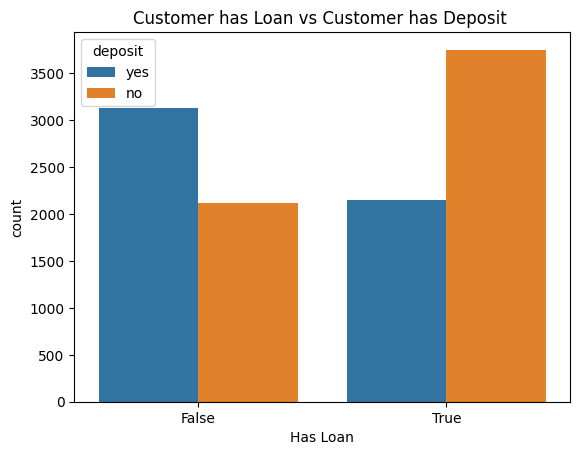

In [21]:
sns.countplot(data=temp,x='Has Loan',hue='deposit')
plt.title("Customer has Loan vs Customer has Deposit ");

- Most of the married customers prefer having a loan the similar trend can be seen in divorced also. However the singles do not prefer to have loans.
- House Loan has more demand as compared to personal loan.
- Customers with loan do not prefer deposits.

In [22]:
marital_bal=bank.groupby('marital',as_index=False).agg({'balance':'mean'})
marital_bal=marital_bal.sort_values(by='balance',ascending=False)

marital_deposit=bank[bank['deposit']=='yes'].groupby('marital',as_index=False).agg({'deposit':'count'})
marital_deposit=marital_deposit.sort_values(by='deposit',ascending=False)
# display(marital_deposit)
# display(marital_bal)

px1=go.Bar(x=marital_bal['marital'],y=marital_bal['balance'])
px2=go.Bar(x=marital_deposit['marital'],y=marital_deposit['deposit'])

fig.update_layout(
    title="Bank Balance vs Jobs ",
    xaxis_title="Job Roles ",
    yaxis_title="Bank Balance",
        font=dict(
        family="Times New Roman",
        size=18,
        color="RebeccaPurple"
    ),
    width = 500,
    height= 500
    
)
fig=make_subplots(rows=1,cols=2,subplot_titles=['Marital Status vs Bank Balance','Marital Status vs Total Deposits '])
fig.add_trace(px1,row=1,col=1)
fig.add_trace(px2,row=1,col=2)

- Married customers represent large population of deposit holders.
- Bank balance of married customers is usually high.As we have concluded earlier that customers with higher balance have deposits.


In [23]:
education_counts=pd.DataFrame(bank['education'].value_counts())
px.pie(names=education_counts.index,values=education_counts['education'].values,title="Distribution of Customers as per education")

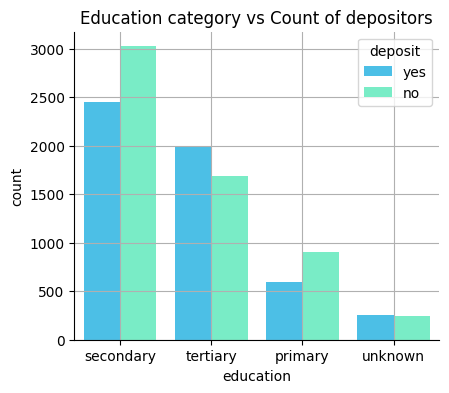

In [24]:
#Stacked Bar plot
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
edu_deposits=bank.groupby('education',as_index=False).agg({'deposit':'count'})
edu_deposits=edu_deposits.sort_values(by='deposit',ascending=False)
# px.bar(x=bank['deposit'],y=bank['education'])
sns.countplot(x='education',hue='deposit',data=bank,palette=['#33ccff','#66ffcc'])
plt.title("Education category vs Count of depositors");
sns.despine()
plt.grid()
# bank.plot(kind='bar',stacked=True,x='education')



- Customers with primary and secondary education do not prefer deposits but those with tertiary do prefer deposits.

Text(0.5, 1.0, 'Term Deposits per Month')

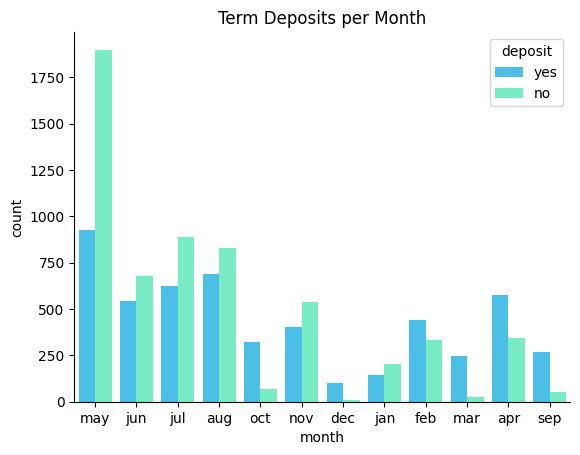

In [25]:
month_deposit=bank.groupby('month').agg({'deposit':'value_counts'})

# month_deposit=month_deposit.sort_values(by='deposit')
month_deposit.rename(columns={'deposit':'deposits_value_counts'},inplace=True)
month_deposit.pivot_table(columns='deposit',values='deposits_value_counts',index='month')

sns.countplot(data=bank,x='month',hue='deposit',palette=['#33ccff','#66ffcc'])
sns.despine()
plt.title("Term Deposits per Month")

- Oct,Dec,Feb,March,Apr and Sep during these months customers open deposits.

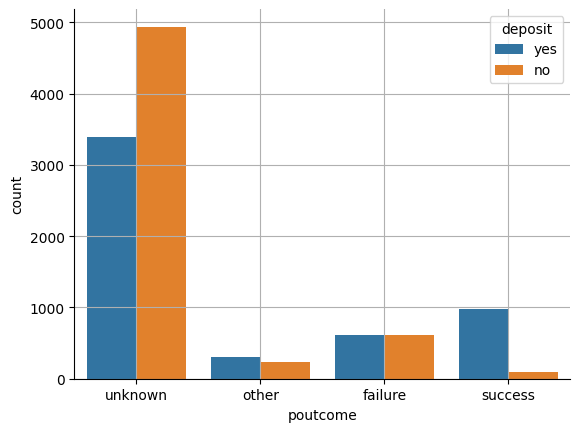

In [26]:
#Outcome of last campaign to term deposit subscription
sns.countplot(data=bank,x='poutcome',hue='deposit');
sns.despine()
plt.grid()

- if the outcome of the campaign was success then probablity of the customer subscribing to deposit is high.
- But in other cases subscribing to deposit is independent of poutcome of the campaign.

<AxesSubplot: >

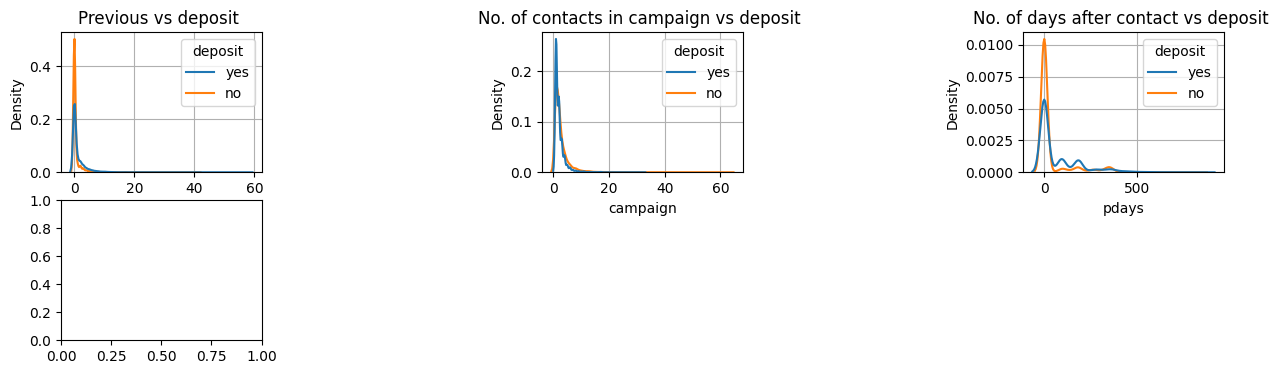

In [27]:
plt.figure(figsize=(15,4))
plt.subplot(2,5,1)
sns.kdeplot(x=bank['previous'],hue=bank['deposit'])
plt.title("Previous Contact vs deposit ")
plt.grid()

plt.subplot(2,5,3)
sns.kdeplot(x=bank['campaign'],hue=bank['deposit'])
plt.title("No. of contacts in campaign vs deposit ")
plt.grid()

plt.subplot(2,5,5)
sns.kdeplot(x=bank['pdays'],hue=bank['deposit'])
plt.title("No. of days after contact vs deposit ")
plt.grid()

plt.subplot(2,5,6)


- We can observe that if the contacts performed for a customer before the campaign started are above 3 or 5 then customers are not likely to open deposits. 
- Contacting the customers in 5-10 times during the capaign increases the chances of him/her subscribing to loan.
- If number of days passed after the campaign was made is greater than 400 then customer is not likely to open a deposit.

- The customer should be contacted less than 5 times before the campaign, then during the campaign contact should be made around 5 times and once the campaign is over next contact should be made in 50-150 days for increasing chances of a customer to subscribe to the bank deposit.

### Revisiting the Hypothesis:
1. True. The proprtion of customers from Unemployed,entrepreneur,housemaid,self-employed & students categories are less likely to subscribe to term-deposits.
2. Most of the population of customers are married and are subscibing to term deposits.
3. True. Ciustomers with secondary and Primary education are more likely to subscribe to term deposits.
4. True. Those witha loan show negative preference to deposits.
5. False. Marketing is different in different months.

### Correlation Matrix

<AxesSubplot: >

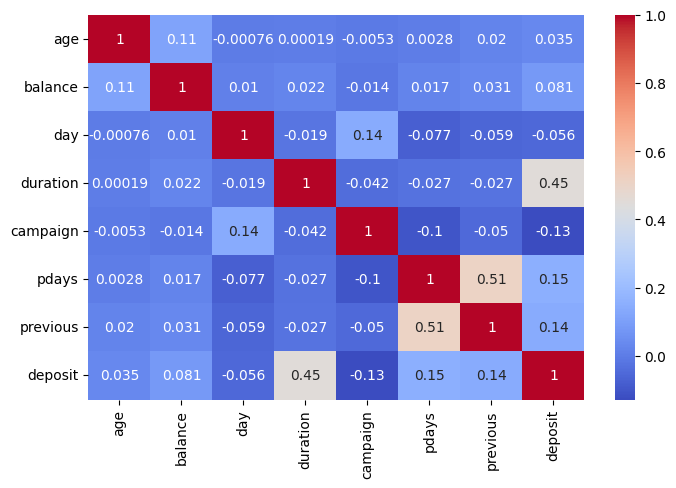

In [28]:
#use label Encoder for converting target values.
lb=LabelEncoder().fit(bank['deposit'])
bank['deposit']=lb.transform(bank['deposit'])

plt.figure(figsize=(8,5))
bank_correlations=bank.corr()
sns.heatmap(bank_correlations,cmap='coolwarm',annot=True)

- Highest correlation of target value deposit is with columns : duration,pdays,previous,and balance these can help to make predictions better.

### Data Preprocessing before applying ML algos:

#### Numerical Variables

In [29]:
def plot_numeric(numeric_cols,X,h=10,w=8):
    plt.figure(figsize=(h,w))
    plt.subplots_adjust(hspace=1.5,wspace=0.8)
    rows=len(numeric_cols)//2
    cols=3

    for i,col in enumerate(numeric_cols):
        plt.subplot(rows,cols,i+1)
        plt.hist(x=X[col])
        plt.title(col)
        plt.xticks(rotation=90)
        plt.plot()
        


Beore Scaling 


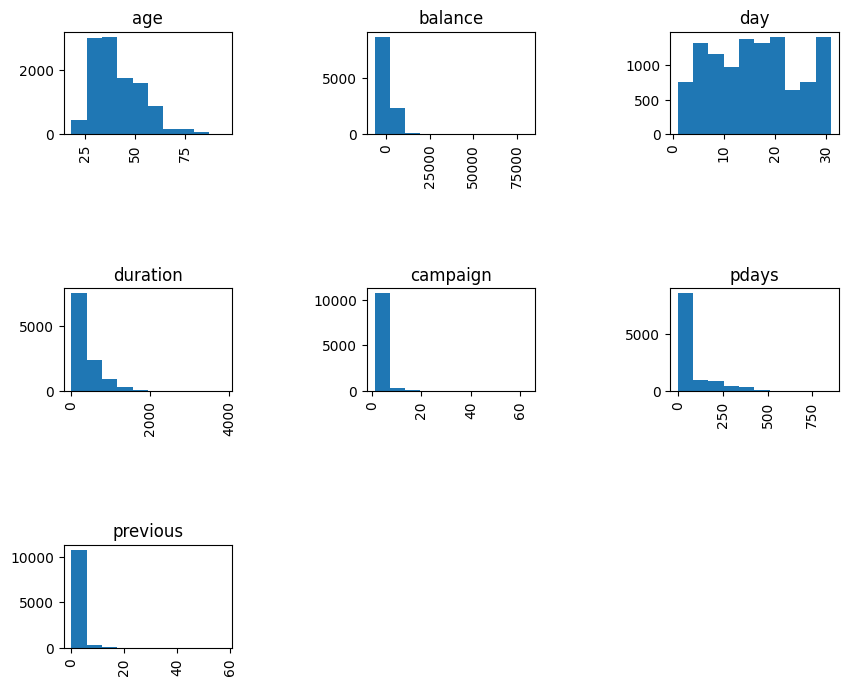

In [30]:
#Data Preprocessing 
print("Beore Scaling ")
X=bank.drop(columns='deposit')
y=bank['deposit']

numeric_cols=X.select_dtypes(exclude='object').columns
plot_numeric(numeric_cols,X)
# numeric_cols



After Scaling


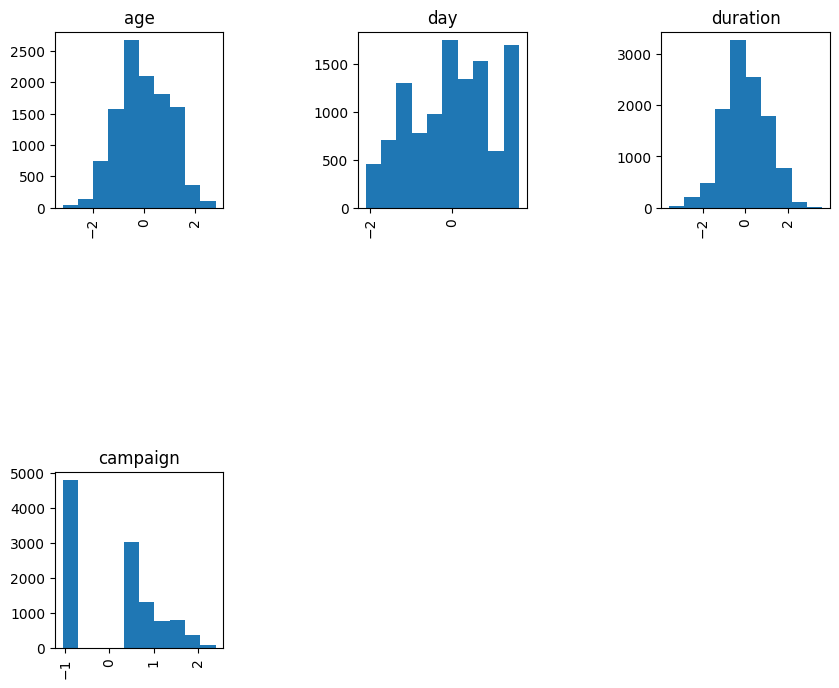

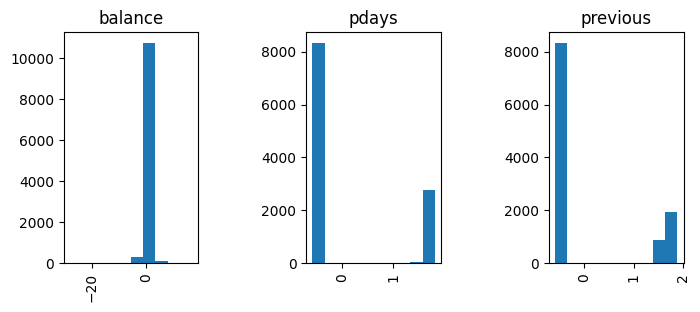

In [31]:
#Use Scaling:
print("After Scaling")
df=X.copy()

strictly_positive=df[numeric_cols].loc[:,df[numeric_cols].min()>0].columns
other_numeric=df[numeric_cols].loc[:,df[numeric_cols].min()<=0].columns

pt1=PowerTransformer(method='box-cox')
pt1.fit(df[strictly_positive])
df[strictly_positive]=pt1.transform(df[strictly_positive])
    
pt=PowerTransformer()
pt.fit(df[other_numeric])
df[other_numeric]=pt.transform(df[other_numeric])

plot_numeric(strictly_positive,df)    
plot_numeric(other_numeric,df,8,3)

#### Categorical Variables Encoding: 

In [32]:
ord=OrdinalEncoder()

ord.fit(df[list(df.select_dtypes('object'))])
df[list(df.select_dtypes('object'))] = ord.transform(df[list(df.select_dtypes('object'))])
X=df
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.393156,0.0,1.0,1.0,0.0,0.397351,1.0,0.0,2.0,-1.312255,8.0,1.633998,-1.058442,-0.583322,-0.581986,3.0
1,1.225089,0.0,1.0,1.0,0.0,-0.461562,0.0,0.0,2.0,-1.312255,8.0,2.107157,-1.058442,-0.583322,-0.581986,3.0
2,0.163473,9.0,1.0,1.0,0.0,0.039476,1.0,0.0,2.0,-1.312255,8.0,2.029763,-1.058442,-0.583322,-0.581986,3.0
3,1.166438,7.0,1.0,1.0,0.0,0.439568,1.0,0.0,2.0,-1.312255,8.0,0.881662,-1.058442,-0.583322,-0.581986,3.0
4,1.106378,0.0,1.0,2.0,0.0,-0.388408,0.0,0.0,2.0,-1.312255,8.0,1.067320,0.323474,-0.583322,-0.581986,3.0


In [33]:
from sklearn.model_selection import train_test_split,StratifiedKFold

## Class to apply all the classification Models and Hyperparametre tuning:

In [34]:
class Bank_Marketing:
    def __init__(self,X,y):
        self.X=X
        self.y=y       
        self.kf=StratifiedKFold(n_splits=5)

    def calculate_scores(self,model,step_wise=False):
        print("model",model)
        test_score=[]
        train_score=[]

        for train_idx,test_idx in self.kf.split(self.X,self.y):
            model.fit(self.X.iloc[train_idx],self.y.iloc[train_idx])
            
            train_score.append(model.score(self.X.iloc[train_idx],self.y.iloc[train_idx]))
            test_score.append(model.score(self.X.iloc[test_idx],self.y.iloc[test_idx]))
            if step_wise==True:
                print(model.score(self.X.iloc[test_idx],self.y.iloc[test_idx]))
        print(" Train Score ",np.mean(train_score),"%\n","Test Score ",np.mean(test_score),"% \n")
        return (np.mean(train_score),np.mean(test_score))

    
    def gridSearch(self,model,parametre):
        grid=GridSearchCV(estimator=model,param_grid=parametre)
        scores =  self.calculate_scores(grid,True)
        print("Best Paramtetres = ",grid.best_params_)

        return scores

    
    def logistic_regression(self,parametres={}):
        lr=LogisticRegression()
        if parametres!={}:
            scores=self.gridSearch(lr,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(lr)
                return scores
            except:
                print("Not possible ")
        



    def svm(self,parametres={}):
        svm=SVC()
        if parametres!={}:
            scores=self.gridSearch(svm,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(svm)
                return scores
            except:
                print("Not possible ")



    def naivebayes(self,parametres={}):
        nb=CategoricalNB()
        if parametres!={}:
            self.gridSearch(nb,parametres)
        else:
            try:
                scores=self.calculate_scores(nb)
                return scores
            except:
                print("Not possible ")



    def KNN(self,parametres={}):
        knn = KNeighborsClassifier()
        if parametres!={}:
            scores=self.gridSearch(knn,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(knn)
                return scores
            except:
                print("Not possible ")


    def custom_nb(self,cat_cols,num_cols):
        catnb=CategoricalNB()
        numnb=GaussianNB()
        print(catnb.fit(X[obj_cols],y))
        print(numnb.fit(X[num_cols],y))
        

        y_predict_cat=catnb.predict(X[obj_cols])
        y_predict_num=numnb.predict(X[num_cols])

        return (y_predict_cat,y_predict_num)


    def DecisionTree(self,parametres={}):
        Dtree = DecisionTreeClassifier()
        if parametres!={}:
            scores=self.gridSearch(Dtree,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(Dtree)
                return scores
            except:
                print("Not possible ")
                
                
    def RandomForest(self,parametres={}):
        forest=RandomForestClassifier()
        if parametres!={}:
            scores=self.gridSearch(forest,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(forest)
                return scores
            except:
                print("Not Possible ")
                
    def AdaBoost(self,parametres={}):
        adaboost=AdaBoostClassifier()
        if parametres!={}:
            scores=self.gridSearch(adaboost,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(adaboost)
                return scores
            except:
                print("Not Possible") 
                
                
    def GradBoost(self,parametres={}):
        gradboost=GradientBoostingClassifier()
        if parametres!={}:
            scores=self.gridSearch(gradboost,parametres)
            return scores
        else:
            try:
                scores=self.calculate_scores(gradboost)
                return scores
            except:
                print("Not Possible")
                
    def XgBoost(self,parametres={}):
        XGboost=XGBClassifier()
        if parametres!={}:
            scores=self.gridSearch(XGboost,parametres)
            return scores
        else:          
            try:
                scores=self.calculate_scores(XGboost)
                return scores
            except:
                print("Not Possible")
           
        

In [35]:
model=Bank_Marketing(X,y)

In [36]:

model_scores=dict()

# model_scores['Logistic Regression '] = model.logistic_regression()
# model_scores['KNN '] = model.KNN()

In [37]:
model_scores['Logistic Regression '] = model.logistic_regression()

model_scores['SVM '] = model.svm()

model_scores['KNN '] = model.KNN()


param={'max_depth':[4,6,8],'min_samples_split':[2,3]}                                                               
model_scores['DecisionTrees'] = model.DecisionTree(param)


forest_param={'n_estimators':[100,125,150],
             'max_depth':[5,8,10],           
             }
model_scores['RandomForest'] = model.RandomForest(forest_param)


grad_param={'n_estimators':[100,150],
           'learning_rate':[0.01,0.05],
            'max_depth':[3,6],
           'min_samples_split':[2,3]}
model_scores['GradBoost'] = model.GradBoost(grad_param)


model_scores_final=model_scores.copy()
# model_scores_final['AdaBoost']=(0.8222990427030611, 0.7796157988594028)
Xgboost_param={'n_estimators':[150,165,180],
              'learning_rate':[0.1],
              'max_depth':[6,8]}
model_scores['XGBoost'] = model.XgBoost(Xgboost_param)

model LogisticRegression()


 Train Score  0.8038435626982402 %
 Test Score  0.7774636962345527 % 

model SVC()
 Train Score  0.8270920514292357 %
 Test Score  0.7863347843603683 % 

model KNeighborsClassifier()
 Train Score  0.8734099152490401 %
 Test Score  0.7426232771060357 % 

model GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_split': [2, 3]})
0.748320644872369
0.7299596954769368
0.7549283154121864
0.7620967741935484
0.7836021505376344
 Train Score  0.8252560870583251 %
 Test Score  0.7557815160985351 % 

Best Paramtetres =  {'max_depth': 4, 'min_samples_split': 2}
model GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'n_estimators': [100, 125, 150]})
0.7760859829825347
0.7568293775190327
0.7956989247311828
0.8517025089605734
0.807347670250896
 Train Score  0.8819888113231708 %
 Test Score  0.797532892888844 % 

Best Paramtetres =  {'max_depth': 5, 'n_estimators': 150}


In [38]:
model_scores

{'Logistic Regression ': (0.8038435626982402, 0.7774636962345527),
 'SVM ': (0.8270920514292357, 0.7863347843603683),
 'KNN ': (0.8734099152490401, 0.7426232771060357),
 'DecisionTrees': (0.8252560870583251, 0.7557815160985351),
 'RandomForest': (0.8819888113231708, 0.797532892888844),
 'GradBoost': (0.8861998994932903, 0.8054179166526219),
 'XGBoost': (0.9447010953776569, 0.8086449670709961)}

In [39]:
# model.naivebayes()
catnb=CategoricalNB()
obj_cols=bank.drop(columns='deposit').select_dtypes(include='object').columns
num_cols=bank.drop(columns='deposit').select_dtypes(exclude='object').columns

obj_cols

pred_cat,pred_num=model.custom_nb(obj_cols,num_cols)

display(pred_cat,pred_num)
# Take out the indexes where both are equal


pred_cat=pd.DataFrame(pred_cat)
pred_num=pd.DataFrame(pred_num)

final_pred=pd.DataFrame()
final_pred['Categorical']=pred_cat
final_pred['Numerical']=pred_num
print(final_pred[final_pred['Categorical']==final_pred['Numerical']].shape[0])
final_pred[final_pred['Categorical']!=final_pred['Numerical']].shape[0]


final_pred['Final Value']=0.8*pred_num + 0.2*pred_cat
final_pred['Final Value'].value_counts()

final_pred['Final Value after sigmoid']=final_pred['Final Value'].apply(lambda x: 1/(1+np.exp(-x)))
final_pred['Final Value after sigmoid'].value_counts()
final_pred['Prediction']=final_pred['Final Value after sigmoid'].apply(lambda x: 0 if x<=0.5 else 1)
final_pred['Prediction'].value_counts()

score=0
for i,j in zip(final_pred['Prediction'].values,y.values):
    if i==j:
        score+=1
        
model_scores['Custom NB'] = score/y.shape[0]



CategoricalNB()
GaussianNB()


array([0, 0, 0, ..., 1, 0, 0])

array([1, 1, 1, ..., 0, 0, 1])

7050


In [40]:
adaboost_para={'n_estimators':[150,175],
              'learning_rate':[0.01,0.05,0.1]}
model_scores['AdaBoost'] = model.AdaBoost(adaboost_para)
# AdaBoostClassifier()


model GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [150, 175]})
0.7218987908643081
0.7657859381997313
0.7728494623655914
0.8297491039426523
0.8077956989247311
 Train Score  0.8222990427030611 %
 Test Score  0.7796157988594028 % 

Best Paramtetres =  {'learning_rate': 0.1, 'n_estimators': 175}


In [41]:

# gradboost = Gradient_Boost()



In [42]:
model_scores

{'Logistic Regression ': (0.8038435626982402, 0.7774636962345527),
 'SVM ': (0.8270920514292357, 0.7863347843603683),
 'KNN ': (0.8734099152490401, 0.7426232771060357),
 'DecisionTrees': (0.8252560870583251, 0.7557815160985351),
 'RandomForest': (0.8819888113231708, 0.797532892888844),
 'GradBoost': (0.8861998994932903, 0.8054179166526219),
 'XGBoost': (0.9447010953776569, 0.8086449670709961),
 'Custom NB': 0.7448485934420355,
 'AdaBoost': (0.8222990427030611, 0.7796157988594028)}

In [43]:
# model_scores['XGBoost'] = model.XgBoost(Xgboost_param)

model_scores_final=pd.DataFrame(model_scores)
model_scores_final

,Logistic Regression,SVM,KNN,DecisionTrees,RandomForest,GradBoost,XGBoost,Custom NB,AdaBoost
0,0.803844,0.827092,0.873410,0.825256,0.881989,0.886200,0.944701,0.744849,0.822299
1,0.777464,0.786335,0.742623,0.755782,0.797533,0.805418,0.808645,0.744849,0.779616


In [44]:
data=model_scores_final.pivot_table(columns=model_scores_final.index,).reset_index().rename(columns={'index':'Models',0:'Train',1:'Test'})


In [45]:
# sns.barplot(data=data,x=model_scores_final.index,y=data['Train'])
data

,Models,Train,Test
0,AdaBoost,0.822299,0.779616
1,Custom NB,0.744849,0.744849
2,DecisionTrees,0.825256,0.755782
3,GradBoost,0.886200,0.805418
4,KNN,0.873410,0.742623
5,Logistic Regression,0.803844,0.777464
6,RandomForest,0.881989,0.797533
7,SVM,0.827092,0.786335
8,XGBoost,0.944701,0.808645


## Comparing Performance of Different Models: 

In [46]:
# sns.barplot(data=data,x='Models',y='Train')

data=data.sort_values(by='Train',ascending=False)
px1=go.Bar(x=data['Models'],y=data['Train'])


data=data.sort_values(by='Test',ascending=False)
px2=go.Bar(x=data['Models'],y=data['Test'])

fig=make_subplots(rows=1,cols=2,subplot_titles=['Models vs Train Scores','Model vs Test Scores '])
fig.add_trace(px1,row=1,col=1)
fig.add_trace(px2,row=1,col=2)

- Best Performance in both Test and Train is given by XGBoost but even after performing Hyperparametre tuning it is showing a lot of overfitting. 
- We certainly don't want our model overfit. So we will drop XgBoost algorithm and use GradBoost so that it doesn't hellucinate.

In [47]:
GradBoost = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100)
GradBoost.fit(X,y)

GradientBoostingClassifier(learning_rate=0.05)

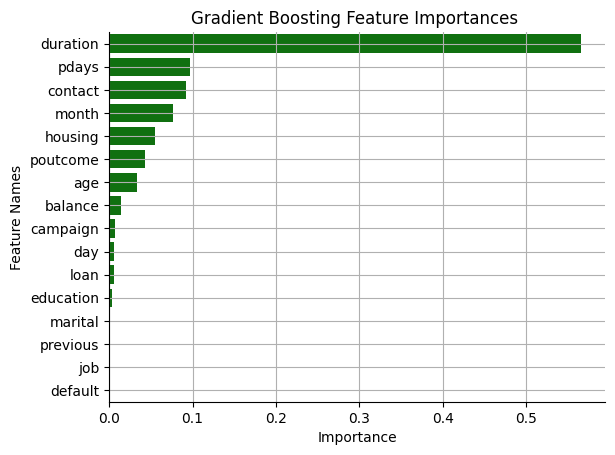

In [171]:
GradBoost.feature_importances_
feature_importance=pd.DataFrame({'Feature Names':X.columns,'Importance':GradBoost.feature_importances_})
feature_importance=feature_importance.sort_values(by='Importance',ascending=False)
sns.barplot(data=feature_importance,x='Importance',y='Feature Names',color='green')
sns.despine()
plt.title("Gradient Boosting Feature Importances ")
plt.grid()

### Deriving Conclusions from the model:-

We need to focus on Features with highest Featureimportance provided by GradBoost:
1. duration
2. pdays
3. contact
4. month 
5. housing

<AxesSubplot: xlabel='deposit', ylabel='duration'>

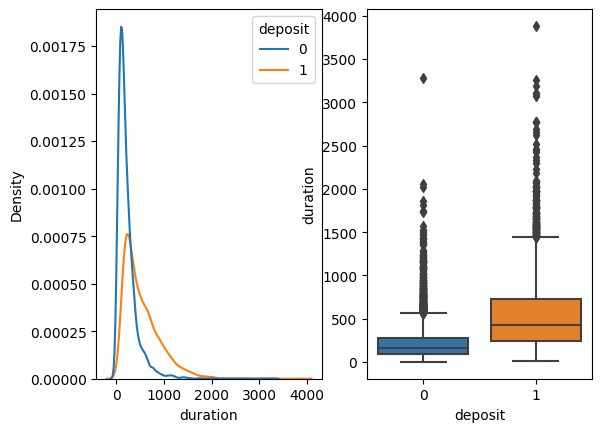

In [87]:
bank['duration']
plt.subplot(1,2,1)
sns.kdeplot(data=bank,x='duration',hue='deposit')

plt.subplot(1,2,2)
sns.boxplot(data=bank,x='deposit',y='duration')

- From the plots we can see that the duration of the contact should be above 300s for the customer to convinced to
    open the bank deposits. 
- Usually very short calls with duration less than 300s don't work
- Ideal duration for maximum benifit should be in the range of 300-700sec.

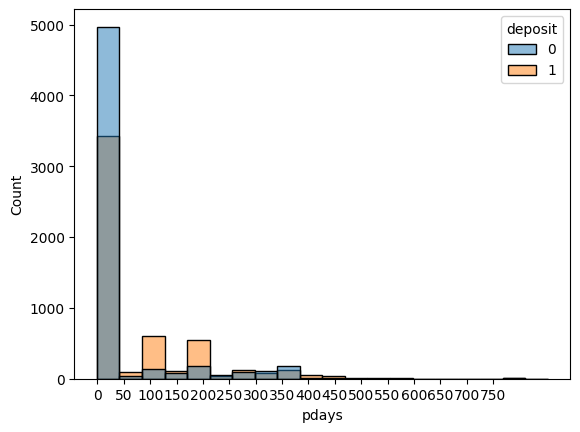

In [90]:
sns.histplot(x=bank['pdays'],hue=bank['deposit'],bins=20)
plt.xticks(range(0, 800, 50));


- As observed from the graph we can see that we can either contact the customers within 50 days after the campaign,in this interval many customers will not agree to subscribe but some may subscribe. This is the best period of increasing contacts.
- The next best interval for contact is between 100-150 days or 175-200 days,in this interval

Index(['cellular', 'unknown', 'telephone'], dtype='object')


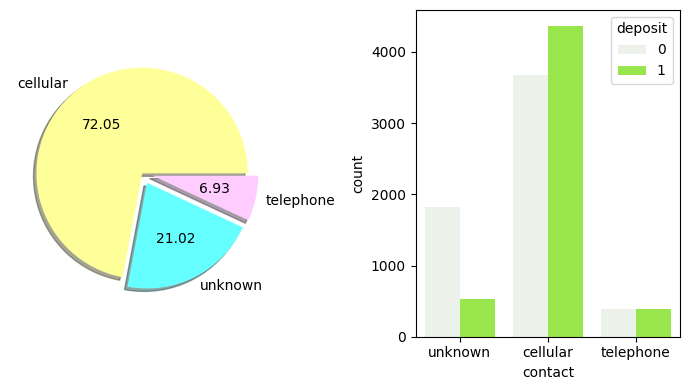

In [169]:
plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
contact_counts=pd.DataFrame(data=bank['contact'].value_counts())
# px.pie(labels=contact_counts.index,values=contact_counts['contact'])
mycolors=['#ffff99','#66ffff','#ffccff']
print(contact_counts.index)
plt.pie(labels=contact_counts.index,x=contact_counts['contact'],autopct='%.2f',explode=[0,0.1,0.1],shadow=True,colors=mycolors);

plt.subplot(1,2,2)
sns.countplot(data=bank,x='contact',hue='deposit',color='#99ff33')

plt.tight_layout()

- More than half of the contacts are celluar these also yeild positive results as compared to other methods.Hence cellular mode of contact should increase and other mode can be minimized

<AxesSubplot: xlabel='month', ylabel='count'>

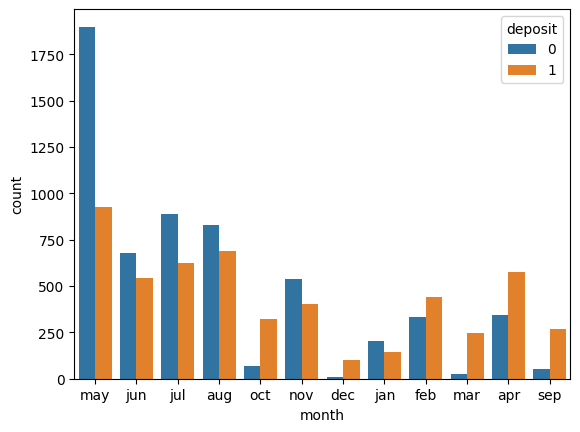

In [170]:
sns.countplot(data=bank,x='month',hue='deposit')

- As already concluded the number of customers subscribing for term deposists is not uniform in different months.
The months of Jan and Nov should be minimized for campaign whereas the months of  oct,feb,apr,march sep should be focused more on.This will enable for a more productive campaign.
- In the months of May ,July and August the bank should target on contacting  old customers from previous campaign within the optimal range of pdays as discussed earlier.So that the campaign will be more succesful to attract customers.

- Housing: We have seen a general trend that customers with any loan are less likely to apply for deposits, there is a
huge proportion of borrowers with a housing loans than personal.
- Keeping this in mind we should be able to target those customers which do not have housing loan so they can be pesuaded to open a deposit.

# Conclusion:

1. At the start I have concentrated upon the given data by checking the duplicates & null values. Fortunately the data was clean enough and did not take much time to preprocess it. Then we moved towards exploring the distribution of data and found out that the data  is quite balanced so there was no need for using any other metric except Accuracy for evaluation.
2. Next we focused on the various columns of data understanding our customer personal data. The data has well large outliers and we have performed EDA to find possible explanation for the the presence of extremss.
3. Columns such as bank balance,age,marital status has a loan gives good idea of cutomers preferfence towards subscribing  for deposits.
4. Columns related to previous campaigns help us to identify the mistakes that might have been done and we can provides possible solutions to make next campaign more successful. pdays,contact,poutcome,duration of calls depicts what customers are intrested in and we can treat them accordingly.
5. Finally we apply various models,tune them,evaluate the performance and compare them. With this we found out XGboost performs well but it overfits so we discard it and go for GradientBoost. Once GradientBoost is done we find out which features contributes the most towards prediction more. This gives us idea of which features to focus on. We finally decide the optimal range of values for this feature to improve success of out next campaign.

Thank You Please upvote my noteboook.....
